# Initial Exploration - IPR of Basic Research


## Purpose
The purpose of the proposed research is to o investigate the impact of retaining or not intellectual property rights (IPR) of basic research in one country on the dynamics of growth in a two-countries setup. In this initial exploration of the topic, the first part is to provide some suggestive empirical evidence about flow of basic research and diffusion in- and out- of Canada. The second part is to leverage simulation techniques to model the basic setup.

## Data Exploration
The data exploration leverages Derwent Innovation Database that lists all patents application worldwide. The data has been cleaned through machine learning techniques. In addition, indicators such as combined patent impact and counts of forward citation are provided.

This first query looks into all applications that have applicants or inventors name listed as UNIV or Institute, and that applications originated in US and Canada. This has the purpose to segment the dataset to patent applications applied for by public institutions.

Query: AC=(CA OR US) AND PAOC=(CA OR US) AND (IN=(UNIV OR Institute) OR PA=(UNIV OR Institute))

In [35]:
import pandas as pd
import numpy as np
import plotly.express as px

In [21]:
# limit of 60k result per patch therefore the requirement is to segment the data

# first patch 1700 - 2000 inclusively 
# The overall trend shows that the number has been rising quickly especially after 2010s
df_2000 = pd.read_csv('~/Derwent-Data/PublicData1700_2000.csv')

C:\Users\zhangyy\AppData\Local\Temp\1\ipykernel_17948\1174523563.py:5: DtypeWarning: Columns (9,10,11,12,13,14,16,17,19,20,21,22,23,26,39,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2000 = pd.read_csv('~/Derwent-Data/PublicData1700_2000.csv')


In [22]:
# Get info on the table
print(df_2000.columns) # column names
df_2000.shape #44 columns and 52097 rows 

Index(['Publication Number', 'Title', 'Title - DWPI', 'Priority Number',
       'Priority Number - DWPI', 'Priority Date', 'Application Number',
       'Application Date', 'Publication Date', 'Estimated Expiration Date',
       'Estimated Expiration Date Factors - Disclaimer',
       'Estimated Expiration Date Factors - Estimated Earliest Effective Filing Date',
       'Estimated Expiration Date Factors - Estimated Terminal Disclaimer Prior Patent',
       'Estimated Expiration Date Factors - Terminal Disclaimer Earliest Estimated Filing Date ',
       'Estimated Expiration Date Factors - Terminal Disclaimer Prior Patent Expiration Date',
       'Estimated Expiration Date Factors - 35 U.S.C. Patent Term Adjustment',
       'Estimated Expiration Date Factors - 35 USC 156 Definitive Date ',
       'Estimated Expiration Date Factors - Publication Date',
       'Estimated Expiration Date Factors - Term of Design',
       'Estimated Expiration Date Factors - Post-grant Patent Term Adjustmen

(52097, 44)

In [15]:
# Initial data exploration, I am only interested in 
# "Inventor - w/address" and "Count of Cited Refs - Patent" "Reassignment (US)" and "Application Date" and "Priority NUmber"

60

In [28]:
df_2000_seg = df_2000[['Application Date', 'Priority Number', 'Inventor Count', 'Inventor - w/address', 'Count of Cited Refs - Patent', 'Assignee/Applicant', 'Inventor', 'Reassignment (US)']]

In [59]:
df_2000_seg['Application Date'] = pd.to_datetime(df_2000_seg['Application Date'], errors='coerce') #wrong format will become NA

C:\Users\zhangyy\AppData\Local\Temp\1\ipykernel_17948\2361487898.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
df_2000_seg['year'] = df_2000_seg['Application Date'].dt.year

C:\Users\zhangyy\AppData\Local\Temp\1\ipykernel_17948\3156584494.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
len(df_2000_seg['year']) == len(df_2000) # all cells have a valid date and year

True

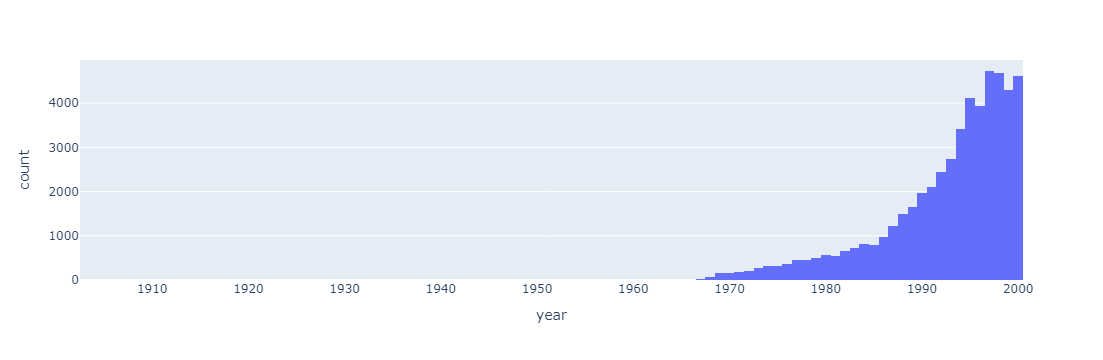

In [66]:
# Annual number of counts 

fig = px.histogram(df_2000_seg, x='year') 
fig.show()

In [34]:
df_2000_seg['Priority Number']

0        US1991672537A | US1993117146A
1                        US1974459300A
2                        US1974487615A
3                        US1974440015A
4                            CA225383A
                     ...              
52092                   WO2000US31465A
52093                   WO2000US31726A
52094                   WO2000US34477A
52095                   WO2000US27462A
52096                    US1999160720P
Name: Priority Number, Length: 52097, dtype: object